In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')

C:\Users\A0100\AppData\Local\Temp\ipykernel_10292\3463096870.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')


In [3]:
df.loc[df["status"]=="null","status"]="canceled"
df.loc[df["status"]=="\\N","status"]="canceled"
df.to_csv("updated_file.csv",index=False)

In [4]:
df=df[df["price"]!=0]
df.to_csv("updated_file.csv",index=False)

In [5]:
df["category_name_1"]=df["category_name_1"].fillna("unknown")
df.to_csv("updated_file.csv",index=False)

In [6]:
df.loc[df["category_name_1"]=="\\N","category_name_1"]="unkown"
df.to_csv("updated_file.csv",index=False)

In [7]:
df=df.drop(columns=["sales_commission_code"])
df.to_csv("updated_file.csv",index=False) 

In [8]:
df.loc[df["BI Status"]=="#REF!","BI Status"]="Net"
df.to_csv("updated_file.csv",index=False) 

In [9]:
df = df[df["created_at"] != "1"]
df = df[df["created_at"] != ""]
df.to_csv("clean_file.csv",index=False)

In [10]:
df = df[df["qty_ordered"] != ""]
df.to_csv("clean_file.csv",index=False)

In [11]:
df = df[df["payment_method"] != ""]
df.to_csv("clean_file.csv",index=False)

In [12]:
df = df[df["Working Date"] != ""]
df.to_csv("clean_file.csv",index=False)

In [13]:
df["New_grand_total"]=df["price"]*df["qty_ordered"]
df.to_csv("updated_file.csv",index=False)

In [14]:
df = df[df["Customer Since"] != ""]
df = df[df["Customer Since"] != "#N/A"]
df = df[df["Customer Since"] != 1806]
df = df[df["Customer Since"] != 25063]
df = df[df["Customer Since"] != 31987]
df = df[df["Customer Since"] != 38108]
df = df[df["Customer Since"] != 41058]
df = df[df["Customer Since"] != 42289]
df = df[df["Customer Since"] != 42396]
df = df[df["Customer Since"] != 43274] 
df = df[df["Customer Since"] != 48132] 
df.to_csv("updated_file.csv",index=False)


In [15]:
total_revenue = df["New_grand_total"].sum()
print(total_revenue)

4195307997.08


In [16]:
total_orders = df['item_id'].nunique()
print(total_orders)

582292


In [17]:
total_canceled_orders = df[df['status'] == 'canceled']['item_id'].count()
print(total_canceled_orders)

200504


In [18]:
total_customers = df['Customer ID'].nunique()
print(total_customers)

115081


In [19]:
avg_order_value = total_revenue / total_orders
print(avg_order_value)

7204.81819616275


In [20]:
customer_counts = df.groupby('Customer ID').size().reset_index(name='Purchase Count')
customer_counts['IsReturning'] = (customer_counts['Purchase Count'] > 1).astype(int)
returning_customers = customer_counts['IsReturning'].sum()
print("Total Returning Customers:", returning_customers)

Total Returning Customers: 64831


In [21]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["Year"] = df["created_at"].dt.year
df["Quarter"] = df["created_at"].dt.to_period("Q")
quarterly_revenue = df.groupby(["Year", "Quarter"])["New_grand_total"].sum().reset_index() 
quarterly_revenue["Prev_Quarter_Revenue"] = quarterly_revenue["New_grand_total"].shift(1)
quarterly_revenue["QoQ%"] = (
    (quarterly_revenue["New_grand_total"] - quarterly_revenue["Prev_Quarter_Revenue"])
    / quarterly_revenue["Prev_Quarter_Revenue"]
) * 100
print(quarterly_revenue)

     Year Quarter  New_grand_total  Prev_Quarter_Revenue        QoQ%
0  2016.0  2016Q3     1.594902e+08                   NaN         NaN
1  2016.0  2016Q4     3.915064e+08          1.594902e+08  145.473567
2  2017.0  2017Q1     2.753281e+08          3.915064e+08  -29.674678
3  2017.0  2017Q2     4.453046e+08          2.753281e+08   61.735968
4  2017.0  2017Q3     2.010233e+08          4.453046e+08  -54.857117
5  2017.0  2017Q4     9.246016e+08          2.010233e+08  359.947357
6  2018.0  2018Q1     7.637453e+08          9.246016e+08  -17.397359
7  2018.0  2018Q2     7.013970e+08          7.637453e+08   -8.163497
8  2018.0  2018Q3     3.329115e+08          7.013970e+08  -52.535945


In [22]:
customer_retention_rate = (returning_customers / total_customers) * 100
print(customer_retention_rate)

56.33510310129387


In [23]:
cancellation_rate = (total_canceled_orders / total_orders) * 100

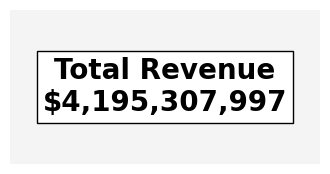

In [24]:
df.columns = df.columns.str.strip()

total_revenue = df["New_grand_total"].sum()

fig, ax = plt.subplots(figsize=(4, 2))
ax.set_facecolor("#f4f4f4")  
ax.text(0.5, 0.5, f"Total Revenue\n${total_revenue:,.0f}", 
        fontsize=20, ha="center", va="center", 
        fontweight="bold", bbox=dict(facecolor="white", edgecolor="black"))

ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.show()

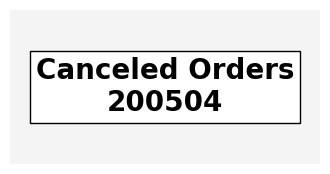

In [25]:
df.columns = df.columns.str.strip()


total_canceled = df[df["status"] == "canceled"].shape[0]

fig, ax = plt.subplots(figsize=(4, 2))
ax.set_facecolor("#f4f4f4")  
ax.text(0.5, 0.5, f"Canceled Orders\n{total_canceled}", 
        fontsize=20, ha="center", va="center", 
        fontweight="bold", bbox=dict(facecolor="white", edgecolor="black"))


ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)


plt.show()

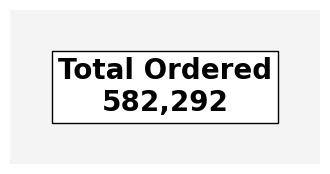

In [26]:
total_orders = df['item_id'].nunique()


fig, ax = plt.subplots(figsize=(4, 2))
ax.set_facecolor("#f4f4f4")  
ax.text(0.5, 0.5, f"Total Ordered\n{total_orders:,.0f}", 
        fontsize=20, ha="center", va="center", 
        fontweight="bold", bbox=dict(facecolor="white", edgecolor="black"))


ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)


plt.show()

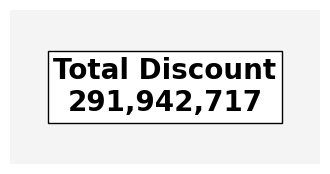

In [27]:
df.columns = df.columns.str.strip()


total_discount = df["discount_amount"].sum()


fig, ax = plt.subplots(figsize=(4, 2))
ax.set_facecolor("#f4f4f4")  
ax.text(0.5, 0.5, f"Total Discount\n{total_discount:,.0f}", 
        fontsize=20, ha="center", va="center", 
        fontweight="bold", bbox=dict(facecolor="white", edgecolor="black"))


ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)


plt.show()

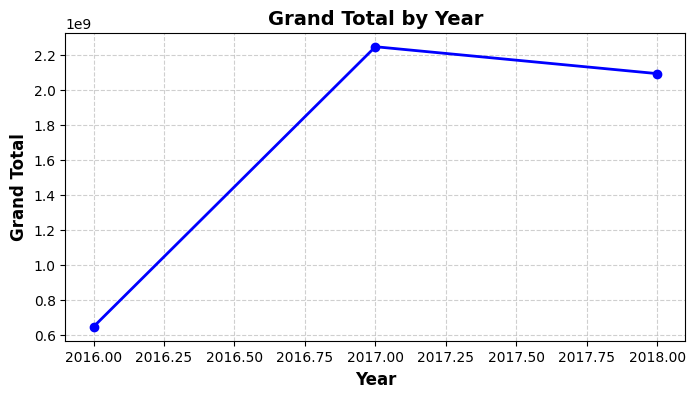

In [28]:
df.columns = df.columns.str.strip()


df["Year"] = pd.to_numeric(df["Year"], errors="coerce")


yearly_total = df.groupby("Year")["grand_total"].sum()


plt.figure(figsize=(8, 4))
plt.plot(yearly_total.index, yearly_total.values, marker="o", linestyle="-", color="b", linewidth=2, markersize=6)


plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Grand Total", fontsize=12, fontweight="bold")
plt.title("Grand Total by Year", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)


plt.show()

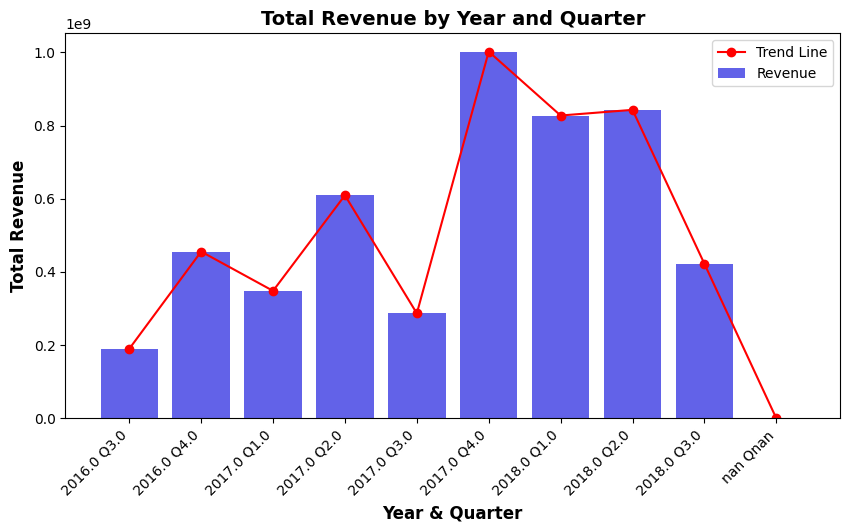

In [29]:
df.columns = df.columns.str.strip()


df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Month"] = pd.to_numeric(df["Month"], errors="coerce")


df["Quarter"] = ((df["Month"] - 1) // 3 + 1).astype(str)
df["Year-Quarter"] = df["Year"].astype(str) + " Q" + df["Quarter"]


quarterly_revenue = df.groupby("Year-Quarter")["grand_total"].sum().reset_index()


plt.figure(figsize=(10, 5))


sns.barplot(x="Year-Quarter", y="grand_total", data=quarterly_revenue, color="blue", alpha=0.7, label="Revenue")


plt.plot(quarterly_revenue["Year-Quarter"], quarterly_revenue["grand_total"], marker="o", linestyle="-", color="red", label="Trend Line")


plt.xlabel("Year & Quarter", fontsize=12, fontweight="bold")
plt.ylabel("Total Revenue", fontsize=12, fontweight="bold")
plt.title("Total Revenue by Year and Quarter", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.legend()


plt.show()

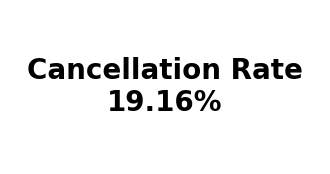

In [30]:
df.columns = df.columns.str.strip()  

total_orders = len(df)
canceled_orders = df[df["status"] == "canceled"].shape[0]


cancellation_rate = (canceled_orders / total_orders) * 100


fig, ax = plt.subplots(figsize=(4, 2))
ax.text(0.5, 0.5, f"Cancellation Rate\n{cancellation_rate:.2f}%", 
        fontsize=20, ha='center', va='center', fontweight='bold')

ax.set_xticks([])  
ax.set_yticks([])  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

C:\Users\A0100\AppData\Local\Temp\ipykernel_10292\2568008238.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sku_orders, x="sku", y="qty_ordered", palette="viridis")


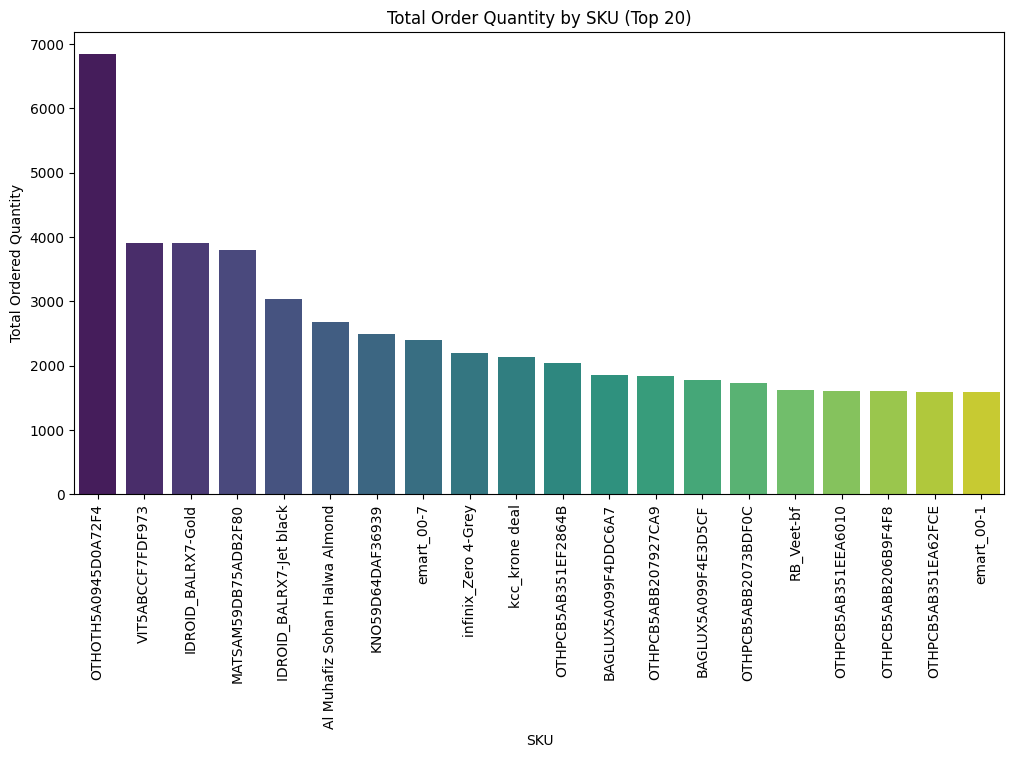

In [31]:
df.columns = df.columns.str.strip()


sku_orders = df.groupby("sku")["qty_ordered"].sum().reset_index()


sku_orders = sku_orders.sort_values(by="qty_ordered", ascending=False).head(20)  


plt.figure(figsize=(12, 6))
sns.barplot(data=sku_orders, x="sku", y="qty_ordered", palette="viridis")


plt.xticks(rotation=90)  
plt.xlabel("SKU")
plt.ylabel("Total Ordered Quantity")
plt.title("Total Order Quantity by SKU (Top 20)")


plt.show()

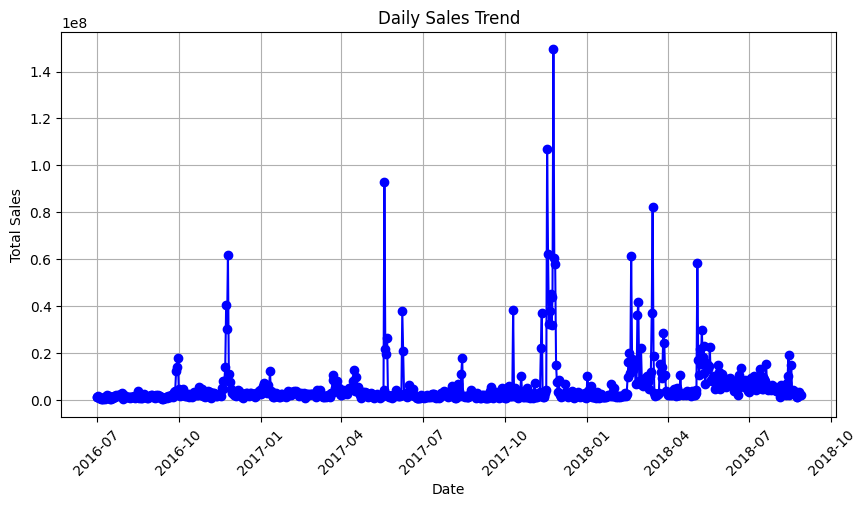

In [32]:
df_daily_sales = df.groupby("created_at")["New_grand_total"].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_daily_sales["created_at"], df_daily_sales["New_grand_total"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()



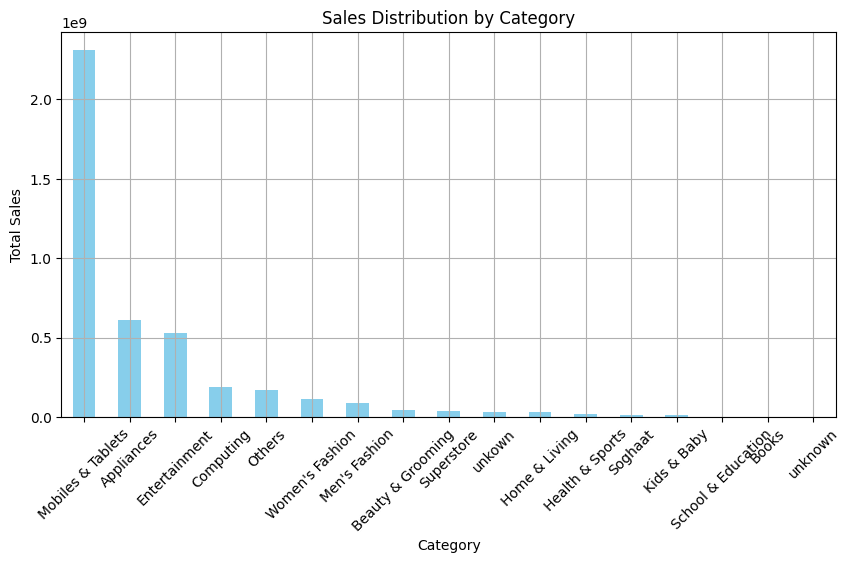

In [33]:
df_category_sales = df.groupby("category_name_1")["New_grand_total"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
df_category_sales.plot(kind="bar", color="skyblue")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Sales Distribution by Category")
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\A0100\AppData\Local\Temp\ipykernel_10292\2075611668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="BI Status", palette="coolwarm")


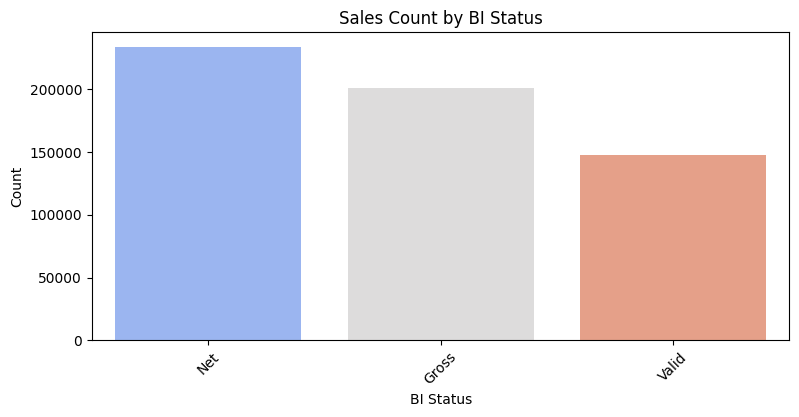

In [34]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x="BI Status", palette="coolwarm")
plt.title("Sales Count by BI Status")
plt.xlabel("BI Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [35]:
fig = px.line(df_daily_sales, x="created_at", y="New_grand_total", title="Interactive Daily Sales Trend")
fig.show()

In [36]:
fig = px.bar(df_category_sales, x=df_category_sales.index, y=df_category_sales.values, title="Sales by Category")
fig.show()


C:\Users\A0100\AppData\Local\Temp\ipykernel_10292\423592629.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\A0100\AppData\Local\Temp\ipykernel_10292\423592629.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




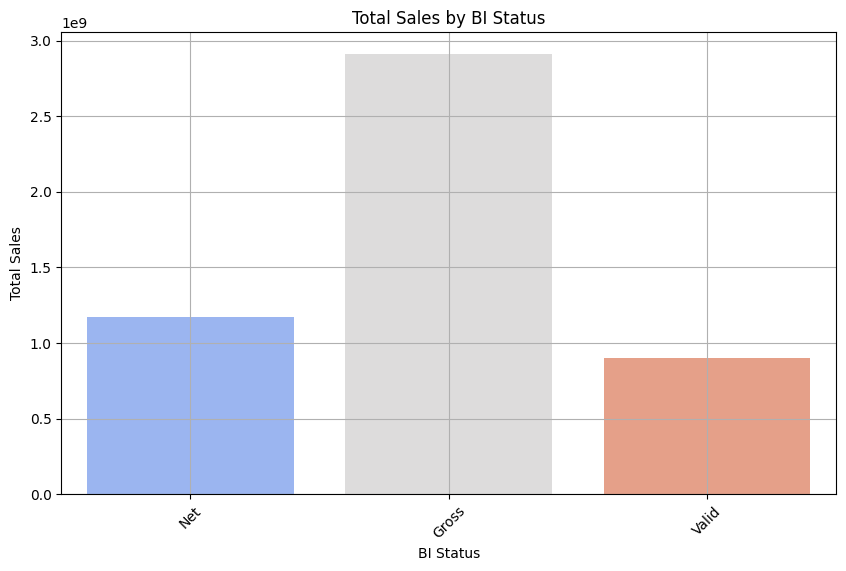

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="BI Status", y="grand_total", estimator=sum, ci=None, palette="coolwarm")
plt.title("Total Sales by BI Status")
plt.xlabel("BI Status")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

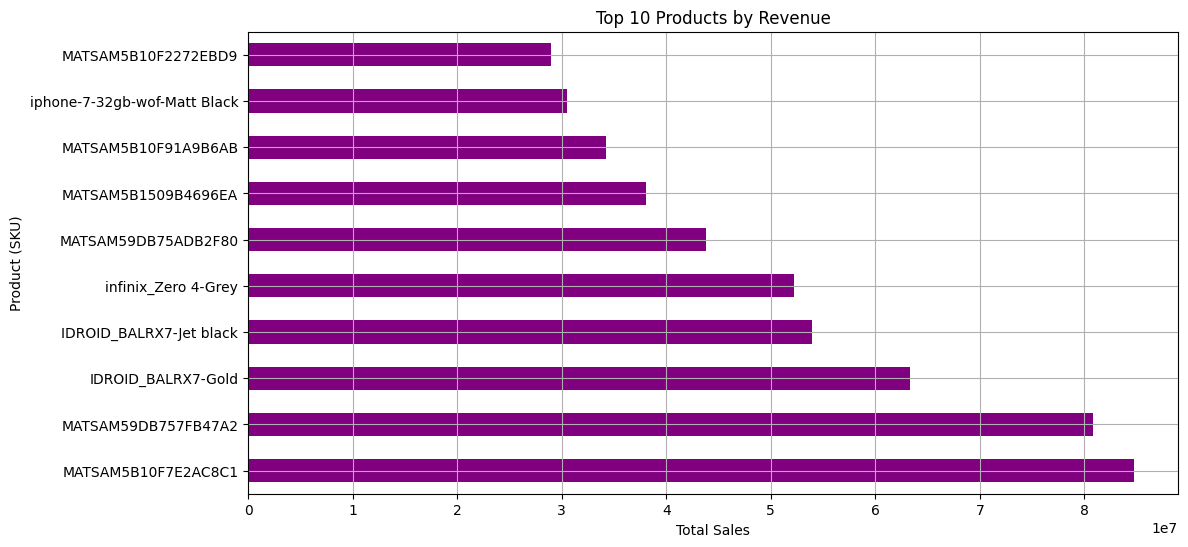

In [38]:
df_product_sales = df.groupby("sku")["grand_total"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
df_product_sales.plot(kind="barh", color="purple")
plt.xlabel("Total Sales")
plt.ylabel("Product (SKU)")
plt.title("Top 10 Products by Revenue")
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6328\3634475479.py:5: DtypeWarning: Columns (1,2,3,7,10,11,12,13,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clean_file.csv")


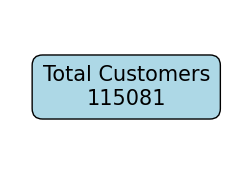

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (update the filename if needed)
df = pd.read_csv("clean_file.csv")

# Ensure column names are clean
df.columns = df.columns.str.strip()

# Calculate the total number of unique customers
total_customers = df["Customer ID"].nunique()

# Create a simple card display
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f"Total Customers\n{total_customers}", fontsize=15,
         ha="center", va="center", bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.5"))

plt.axis("off")  # Hide axes
plt.show() 

Total Returning Customers: 64831


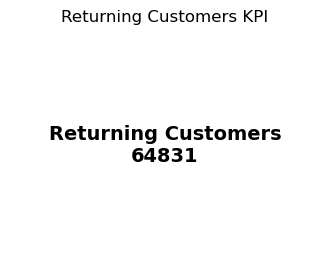

In [ ]:
customer_counts = df.groupby('Customer ID').size().reset_index(name='Purchase Count')
customer_counts['IsReturning'] = (customer_counts['Purchase Count'] > 1).astype(int)
returning_customers = customer_counts['IsReturning'].sum()
print("Total Returning Customers:", returning_customers)
# Create a KPI Card
fig, ax = plt.subplots(figsize=(4, 3))
ax.text(0.5, 0.5, f"Returning Customers\n{returning_customers}", 
        fontsize=14, ha='center', va='center', fontweight='bold')
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title("Returning Customers KPI", fontsize=12)
plt.show()

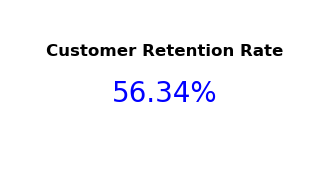

In [ ]:
customer_retention_rate = (returning_customers / total_customers) * 100

# Create the figure
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# Display the KPI in the card
ax.text(0.5, 0.7, "Customer Retention Rate", fontsize=12, ha="center", fontweight="bold")
ax.text(0.5, 0.4, f"{customer_retention_rate:.2f}%", fontsize=20, ha="center", color="blue")

# Show the card
plt.show()

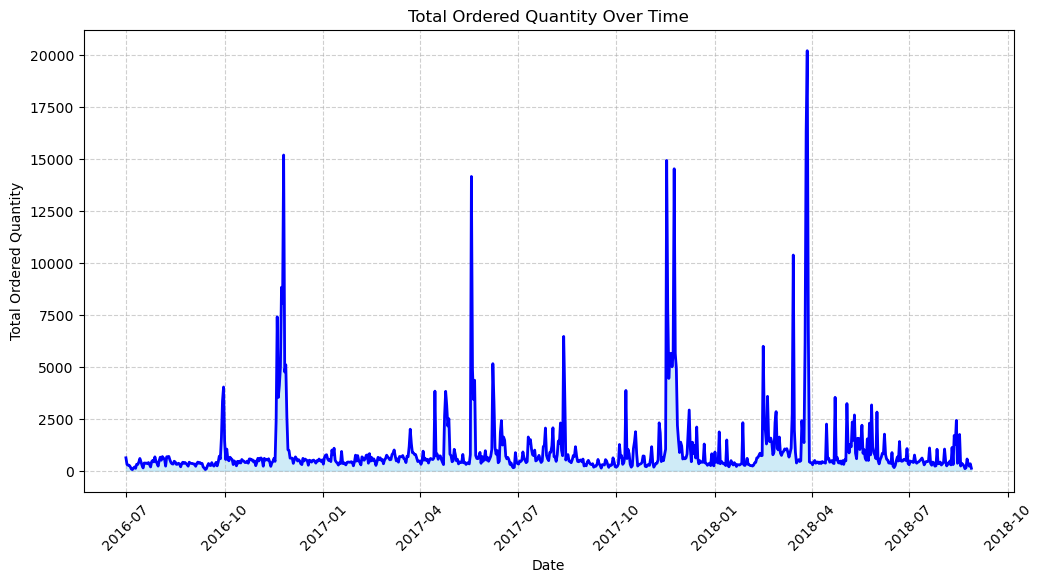

In [ ]:
df["created_at"] = pd.to_datetime(df["created_at"])

# Aggregate ordered quantity by date
df_grouped = df.groupby("created_at")["qty_ordered"].sum().reset_index()

# Plot area chart
plt.figure(figsize=(12, 6))
plt.fill_between(df_grouped["created_at"], df_grouped["qty_ordered"], color="skyblue", alpha=0.4)
plt.plot(df_grouped["created_at"], df_grouped["qty_ordered"], color="blue", linewidth=2)

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Total Ordered Quantity")
plt.title("Total Ordered Quantity Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

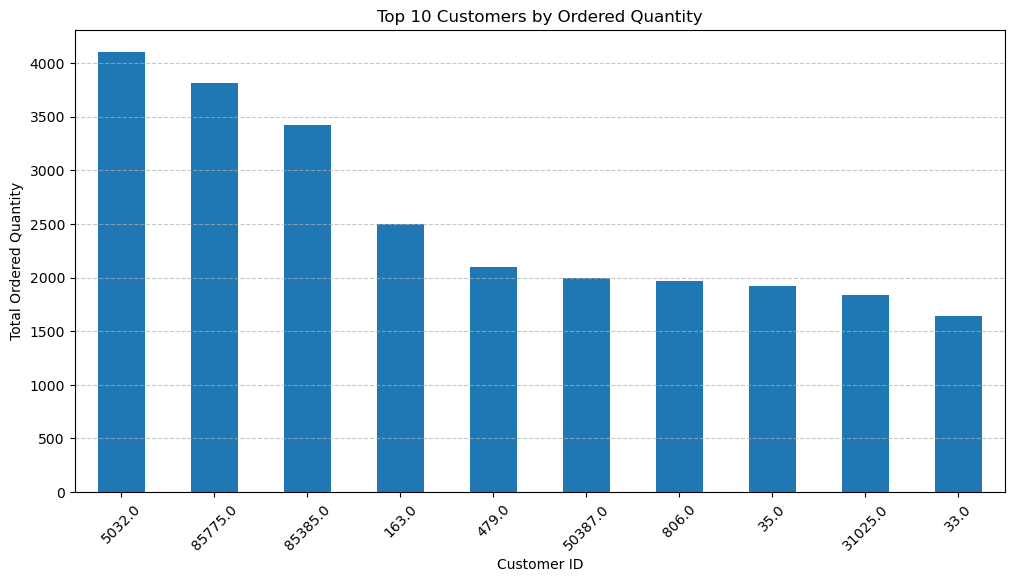

In [ ]:
df["Customer ID"] = df["Customer ID"].astype(str)
df["qty_ordered"] = pd.to_numeric(df["qty_ordered"], errors="coerce")

# تجميع الكمية المشتراة حسب كل عميل
top_customers = df.groupby("Customer ID")["qty_ordered"].sum().nlargest(10)

# رسم Stacked Column Chart
plt.figure(figsize=(12, 6))
top_customers.plot(kind="bar", stacked=True, colormap="tab10")

# تخصيص الرسم
plt.xlabel("Customer ID")
plt.ylabel("Total Ordered Quantity")
plt.title("Top 10 Customers by Ordered Quantity")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# عرض المخطط
plt.show()